# Glauber on infinite random $k$-regular graph
Compute magnetization in the thermodynamic limit $N\to\infty$.

Reproduce the results in *Barthel et. al*, [Matrix product algorithm for stochastic dynamics on networks applied to nonequilibrium Glauber dynamics](https://doi.org/10.1103/PhysRevE.97.010104) for $k=3$.

In [3]:
using MatrixProductBP, MatrixProductBP.Models
using Plots
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

┌ Info: Precompiling MatrixProductBP [3d39929c-b583-45fa-b331-3f50b693a38a]
└ @ Base loading.jl:1662


In [4]:
include("../../telegram/notifications.jl")

default_tg_text (generic function with 1 method)

In [147]:
q = q_glauber   # number of states is 2 for spin variables
T = 50          # final time
k = 3           # degree
m⁰ = 0.5;       # magnetization at time zero

In [158]:
svd_trunc = TruncBond(16)
maxiter = 100
tol = 1e-3
A, iters, Δs = glauber_infinite_graph(T, k, m⁰; svd_trunc, maxiter, tol);

Iterating BP on infinite graph  18%|███▊                 |  ETA: 0:11:21
  iter:  18/100
  Δ:     0.0012261/0.001

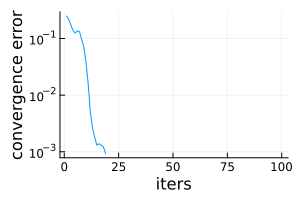

In [159]:
plot(Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, 
    size=(300,200), label="")

In [160]:
# compute magnetization, correlation and covariance
m, r, c = observables_glauber_infinite_graph(A, k, m⁰; svd_trunc, showprogress=true);

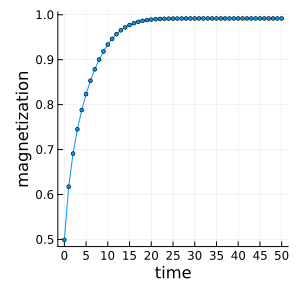

In [161]:
plot(0:T, m, m=:o, xlabel="time", ylabel="magnetization", label="",
    size=(300,300), xticks=0:5:T, ms=2)

Compare with:

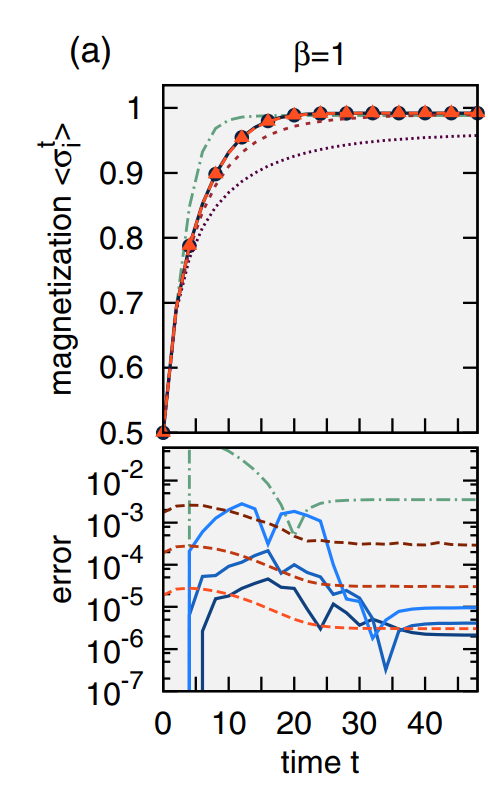

In [167]:
using ColorSchemes
function plot_autocovs(c, T; skip_even=true, kw...)
    step = skip_even ? 2 : 1
    us = 8:4:T
    cg = cgrad(:matter, length(us), categorical=true)
    ylabel = "\$\\langle\\sigma_i^t\\sigma_i^{t+\\Delta t}\\rangle-" * 
        "\\langle\\sigma_i^t\\rangle\\langle\\sigma_i^{t+\\Delta t}\\rangle \$"
    xlabel = "\$\\Delta t \$"
    pl = plot(;xlabel, ylabel, legend=:outertopright, title="Glauber infinite $k-regular")
     
    for (j,u) in enumerate(us)
        plot!(pl, u:-step:1, c[(0:step:u-1) .+ 1,u+1], label="t+Δt=$u", c=cg[j], m=:o, msc=cg[j]; kw...) 
    end
    pl
end  

plot_autocovs (generic function with 1 method)

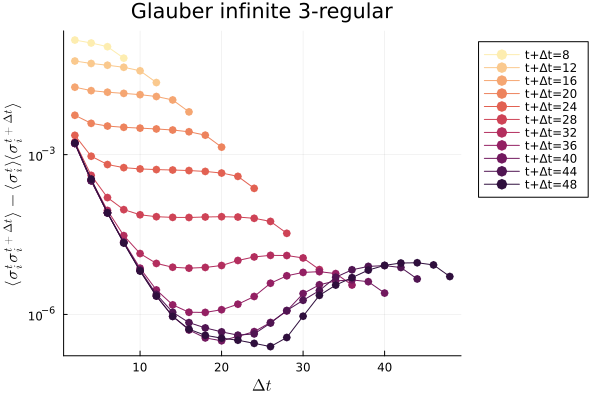

In [168]:
skip_even = true
pl_autocov = plot_autocovs(c, T; skip_even, yaxis=:log10)

Compare with:

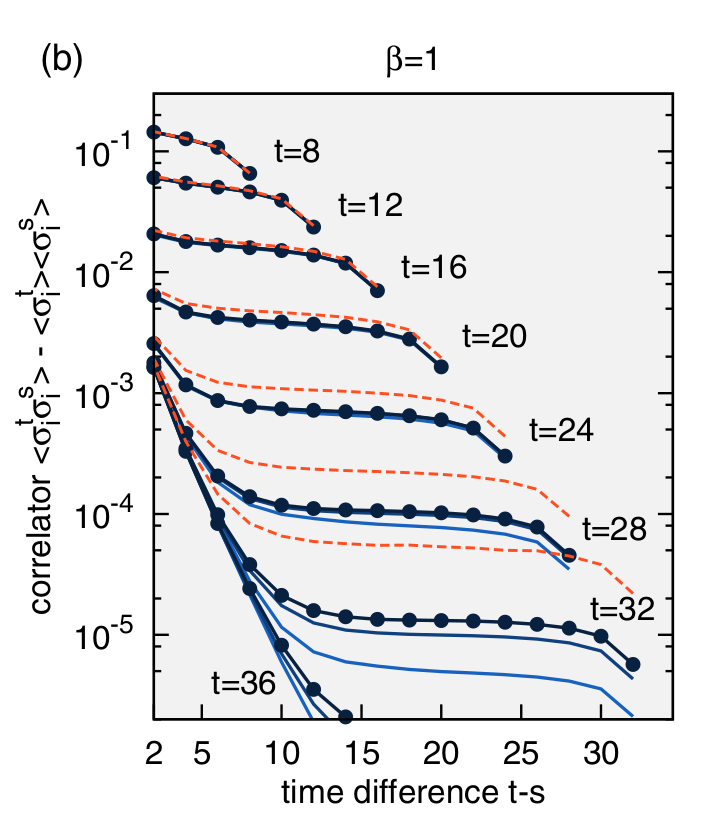